### TAREA 9, DIFERENCIAS FINITAS. PARTE 2. 

__Ejercicio 2__. Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$'s cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?, para ver esto grafica el error relativo a $f'(x_0)$:
$$\epsilon=\left|\frac{\Delta f(x_0,h)/h-f'(x_0)}{f'(x_0)}\right|,$$
respecto a $h$.

In [6]:
function derivada_numerica(x,h,f::Function)
    return  (f(x+h)-f(x))/h #aplicando la definción de derivada.
end


derivada_numerica (generic function with 1 method)

In [74]:
r=(x=0.5;h=linspace(1,0.0001,1000);f(x)=cos(x); derivada_numerica.(x,h,f)) #creamos una lista con valores de la derivada númerica de la función cos(x) variando el valor de h, tomando valores de: (1,0.0001), y el punto de evaluación x=0.5.

1000-element Array{Float64,1}:
 -0.806845
 -0.806654
 -0.806463
 -0.806271
 -0.80608 
 -0.805887
 -0.805695
 -0.805502
 -0.805309
 -0.805115
 -0.804922
 -0.804728
 -0.804533
  ⋮       
 -0.484291
 -0.483853
 -0.483415
 -0.482978
 -0.48254 
 -0.482102
 -0.481663
 -0.481225
 -0.480786
 -0.480347
 -0.479909
 -0.479469

In [52]:
 #esta función crea una lista con los inversos del intervalo m, esto es los valores de h. 
function inversos_h(xo)
    list=zeros(1000); 
    m=linspace(1,0.0001,1000)
    for i in 1:1000 #con el for se llena list con los inversos. 
       x=1/(m[i]) 
        list[i]=x;
    end
    return list
end

inversos_h (generic function with 1 method)

In [67]:
n=inversos_h(1);

In [25]:
using PyPlot


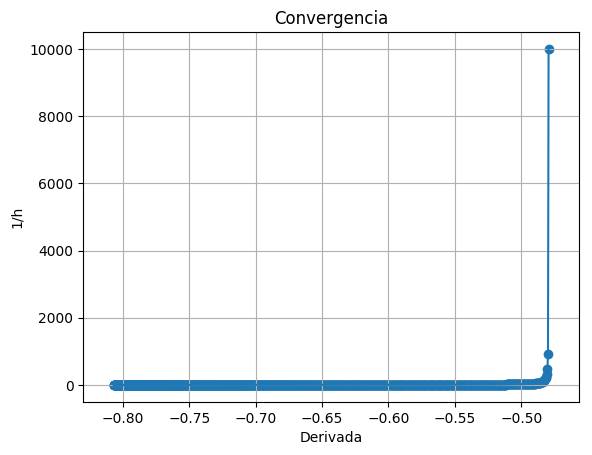

In [54]:
scatter(r,n);
plot(r,n)
xlabel("Derivada")
    ylabel("1/h")
    title("Convergencia")
    grid("on")

La gráfica de 1/h nos da una forma hiperbólica, donde el valor de la derivada exacta es $f'(x_{o})=-0.479426$ y aproximadamente explota para cuando $1/h$ es 10000, es decir para el valor más pequeño de $h$ como se esperaría.

Ahora vamos a gráficar el error relativo.

In [55]:
function error_relativo(xo)
    list=zeros(1000); 
    x=xo;
    for i in 1:1000  #con el for se llena list con aplicar la fórmula de error relativo que se muestra... 
       x=abs((r[i]+0.479426)/-0.479426) #el valor de la derivada fue sacado de Wolfram como referencia. 
        list[i]=x;
    end
    return list
end

error_relativo (generic function with 1 method)

In [56]:
y=linspace(1,0.0001,1000); #valores de h.

In [59]:
j=error_relativo(3); #valores de error relativo para cada cada valor de la derivada númerica guardada en la lista de nombre "r".

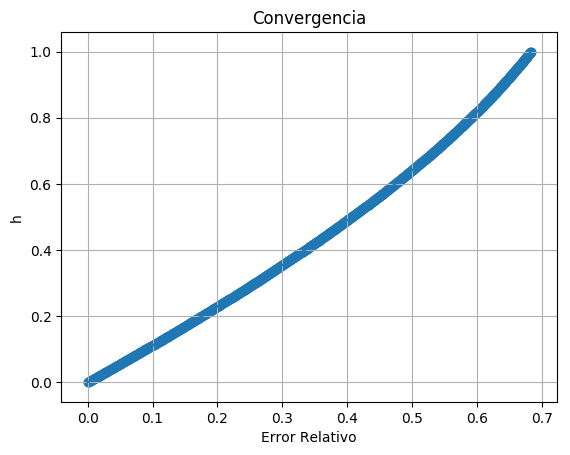

In [62]:
scatter(j,y);
plot(j,y)
xlabel("Error Relativo")
    ylabel("h")
    title("Convergencia")
    grid("on")

Al graficar el error contra h se obtiene aproximadamente que es de orden lineal. Notando para el valor más pequeño de $h=0.0001$ se observa que el error es practicamente $0$. 

__Ejercicio 3__. Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar el cálculo de la derivada numérica? Comenta.



RESPUESTA:

La serie de Taylor de $f(x-h)$ es:
$$f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right).$$

y para $$f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right).$$

restando las ecuaciones anteriores obtenemos: 
$$f(x+h)-f(x-h)=  2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}  + 2\frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right).$$

Los términos pares se cancelan.

despejando para obtener el error: 
$$\frac{f(x+h)-f(x-h)}{2h}- \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}  = \mathcal{O}\left(h^{2}\right).$$

Notemos que ahora el error es de orden dos pues en la igualdad de la resta queda un término de $h^{3}$ que al despejar la derivada exacta se obtendrá un valor de $h^{2}$ con lo que concluimos que se mejora el método para calcular la derivada númerica. 

__Ejercicio 4__. Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.


In [70]:
function derivada_simetrica(x,h,f::Function)
    return  (f(x+h)-f(x-h))/2h #aplicando la definción de derivada simétrica obtenida en el ejercicio 3.
end


derivada_simetrica (generic function with 1 method)

In [75]:
p=(x=0.5;h=linspace(1,0.0001,1000);f(x)=cos(x); derivada_simetrica.(x,h,f)) #Para el mismo ejemplo que en el ejercicio 2, sólo cambia la fórmula.

1000-element Array{Float64,1}:
 -0.403423
 -0.403567
 -0.403711
 -0.403856
 -0.404   
 -0.404144
 -0.404288
 -0.404431
 -0.404575
 -0.404719
 -0.404862
 -0.405005
 -0.405149
  ⋮       
 -0.479416
 -0.479417
 -0.479419
 -0.47942 
 -0.479422
 -0.479423
 -0.479423
 -0.479424
 -0.479425
 -0.479425
 -0.479425
 -0.479426

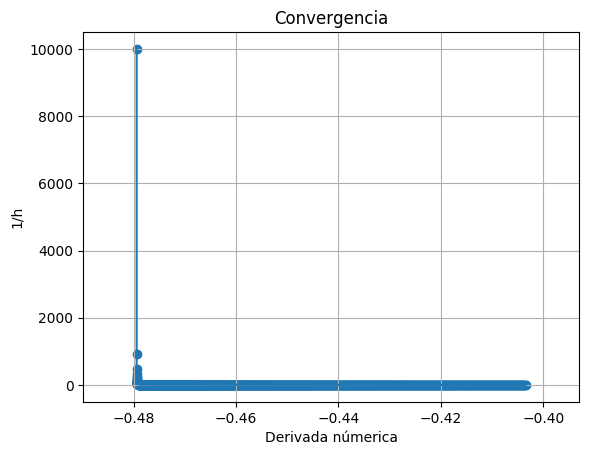

In [69]:
scatter(p,n); #se usa la lista n para los inversos del intervalo de h.
plot(p,n) 
xlabel("Derivada númerica")
    ylabel("1/h")
    title("Convergencia")
    grid("on")

Notamos que en este caso, la convergencia de la derivada se da en dirección opuesta, pero de nuevo cuando $1/h=10000$ se observa que el valor de la derivada numerica de nuevo está cerca de $f'(x_{o})=-0.479426$

In [76]:
function error_relativosimetrico(xo)
    list=zeros(1000); 
    x=xo;
    for i in 1:1000  #se usa la lista p para sacar el error relativo a sus valores iterando con el ciclo for. 
       x=abs((p[i]+0.479426)/-0.479426)
        list[i]=x;
    end
    return list
end

error_relativosimetrico (generic function with 1 method)

In [77]:
j1=error_relativosimetrico(0.1);

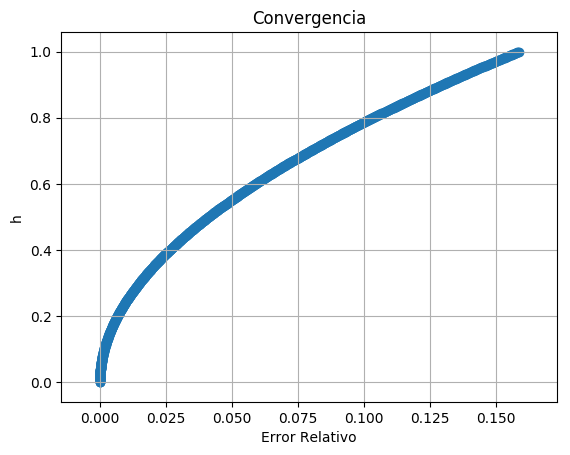

In [80]:
scatter(j1,y)

xlabel("Error Relativo")
    ylabel("h")
    title("Convergencia")
    grid("on")

Se observa que el error ahora es de forma cuadrática como se encontró en el ejercicio 4, teniendo de nuevo para cuando $h=0.0001$ el error es menor.

__Ejercicio 5:__ Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

$$\Delta_h (f):=\Delta f(x,h)=f(x+h)-f(x)$$

Sean $f$ y $g$  funciones y $\alpha$, $\beta$ números reales.

$$\Delta_h (\alpha f +\beta g)=\Delta (\alpha f +\beta g)(x,h)=(\alpha f +\beta g)(x+h)-(\alpha f +\beta g)(x) $$

Por la definción de suma de funciones de variable real se obtiene lo siguiente: 
$$(\alpha f +\beta g)(x+h)-(\alpha f +\beta g)(x)=\alpha f(x+h) + \beta g(x+h) - \alpha f(x) -\beta g(x)$$

reordenando y factorizando las constantes: 
$$\Delta (\alpha f +\beta g)(x,h)=\alpha(f(x+h)- f(x)) + \beta(g(x+h)- g(x))$$

Los dos términos del lado derecho de la ecuación anterior corresponden a aplicar $\Delta_h$ a las gunciones f y g, esto es: 

$$\Delta (\alpha f +\beta g)(x,h)=\alpha(\Delta(f)(x,h)) + \beta(\Delta(g)(x,h))$$

Por tanto obtenemos que:
$$\Delta_h (\alpha f +\beta g)=\alpha(\Delta_{h}(f)) + \beta(\Delta_{h}(g))$$

Concluyento que el operador $\Delta_{h}$ es lineal pues abre sumas y saca escalares como se observa en la ecuación anterior.

__Ejercicio 6:__ Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.

Notemos del desarrollo en serie del operador $\Delta_{h}$ tiene la forma del desarrollo de Taylor para la función exponencial.

$$e^{x}=\sum_{n=0}^{\infty} \frac{x^{n}}{n!}$$

así, sustituyendo el valor de $x$ por $h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$ obtenemos:
$$e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}=\sum_{n=0}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$.

Finalmente, restando el término de $n=0$ de ambos lados tenemos finalmente la relación on el operador:

$$e^{(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }})}-1=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}=\Delta_{h}$$.

obteniendo la función: $\phi(x)=e^{x}-1$ para poder despejar el valor de la derivada exacta.

\begin{eqnarray}
\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}&=&\frac{1}{h}\log\left(1+\Delta_h\right)\\
&=&\frac{1}{h}\left( \Delta_h-\frac{1}{2}\Delta^2_h +\dots\right).
\end{eqnarray}

usando el desarroyo de Taylor para logartimo pero en $\Delta_{h}$